In [ ]:
from statistics import quantiles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [ ]:
# write your code here
conn = sqlite3.connect("../db.sqlite3")

dataset = pd.read_sql_query(
    "SELECT * "
    "FROM restaurant_orderitem "
    "INNER JOIN restaurant_product "
    "ON product_id == restaurant_product.id "
    "INNER JOIN restaurant_order "
    "ON order_id == restaurant_order.id "
, conn)
dataset = dataset.drop(columns=["order_id", "product_id"])
dataset = dataset.loc[:,~dataset.columns.duplicated()].copy()

dataset.to_csv("order_dataset.csv", header=True, index=False)

df = pd.read_csv("order_dataset.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df.head()

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

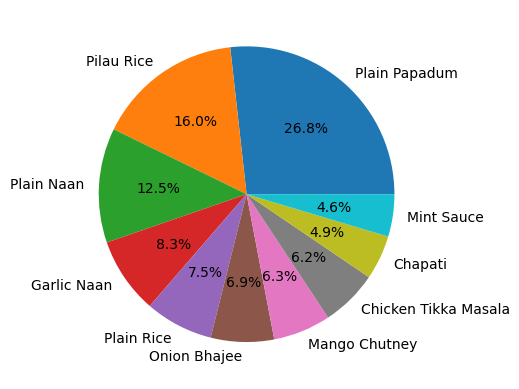

In [86]:
# write your code here
grouped_df = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(10)
grouped_df = pd.DataFrame(grouped_df).reset_index()

quantity = grouped_df["quantity"]
labels = grouped_df["name"]


plt.pie(quantity, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 position by price quantity")
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

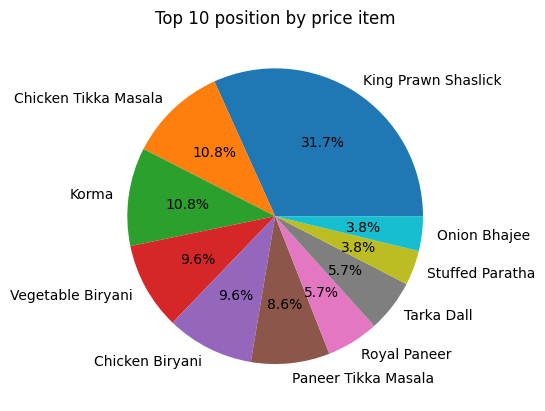

In [109]:
# write your code here
df["Item Price"] = df["quantity"] * df["price"]
item_price = df["Item Price"].sort_values(ascending=False).head(10)

labels_index = item_price.index.tolist()
labels = df.name[labels_index]

plt.pie(item_price, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 position by price item")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

Text(0.5, 0, 'Order hour')

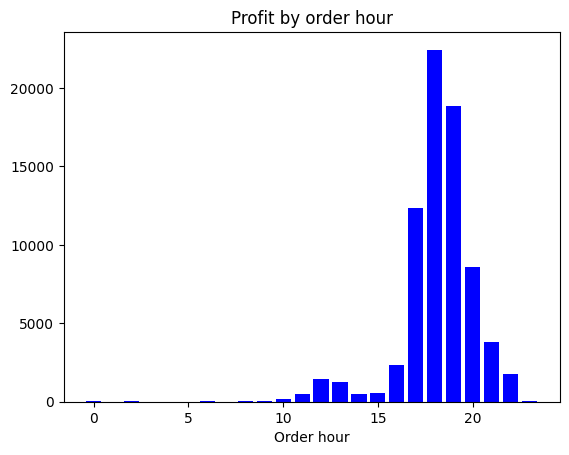

In [144]:
# write your code here
df["Order Hour"] = df["datetime"].dt.hour
order_hour_group = df.groupby("Order Hour")
order_hour_create = order_hour_group["quantity"].count()
order_hour_create = order_hour_create.reset_index()

plt.bar(order_hour_create["Order Hour"], order_hour_create["quantity"], color="blue")
plt.title("Profit by order hour")
plt.xlabel("Order hour")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

([<matplotlib.axis.XTick at 0x12e07c5be90>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

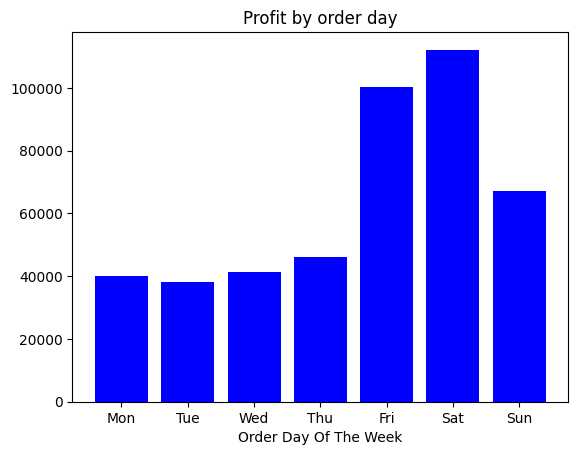

In [156]:
# write your code here
df["Order Day Of The Week"] = df["datetime"].dt.weekday
order_day_group = df.groupby("Order Day Of The Week")
order_day_income = order_day_group["quantity"].count() * order_day_group["Item Price"].mean()

plt.bar(order_day_income.index.to_list(), order_day_income, color="blue")
plt.title("Profit by order day")
plt.xlabel("Order Day Of The Week")
plt.xticks(np.arange(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])